## Day 04 - KNN Classifier Numpy Implementation
6-Dec-2021, Monday

## Load the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dirpath = "../data/knn/classification/"
X = np.load(dirpath+"X_data.npy")
y = np.load(dirpath+"Y_data.npy")
print(X.shape, y.shape)

(500, 2) (500,)


In [12]:
color_map = {
    0: np.array((235, 64, 52))/255,
    1: np.array((52, 235, 104))/255,
    2: np.array((219, 92, 122))/255,
}
colors = [color_map[label] for label in y]
print(colors[:10])

[array([0.85882353, 0.36078431, 0.47843137]), array([0.92156863, 0.25098039, 0.20392157]), array([0.92156863, 0.25098039, 0.20392157]), array([0.92156863, 0.25098039, 0.20392157]), array([0.92156863, 0.25098039, 0.20392157]), array([0.20392157, 0.92156863, 0.40784314]), array([0.85882353, 0.36078431, 0.47843137]), array([0.92156863, 0.25098039, 0.20392157]), array([0.20392157, 0.92156863, 0.40784314]), array([0.85882353, 0.36078431, 0.47843137])]


In [9]:
y[:10]

array([2, 0, 0, 0, 0, 1, 2, 0, 1, 2])

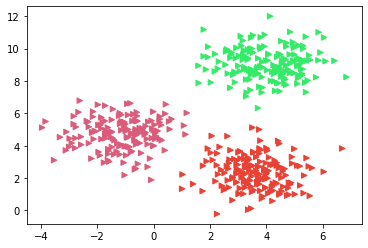

In [13]:
plt.scatter(X[:,0], X[:,1], c=colors, s=30, marker=">")
plt.show()

## Split our data into training and test set

In [14]:
# we want to split data 
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [25]:
y_train[:10]

array([1, 2, 0, 0, 2, 0, 2, 0, 1, 1])

In [26]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(400, 2) (400,)
(100, 2) (100,)


## Implementation of KNN algo using numpy
1. Compute distance of each test point from each point in trainig set
2. Sort the distance
3. Get the top knn based on distance
4. Get categories of knn
5. Prediction is the majority vote

In [57]:
class KNNclassififer:
    
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.xtrain = X
        self.ytrain = y
        
    def predict(self, X_test):
        
        prediction = np.empty((X_test.shape[0]), dtype=np.int32)
        for i in range(len(X_test)):
            #  compute distance
            distance = np.linalg.norm(self.xtrain-X_test[i], ord=2, axis=1)
            knn_idx = np.argsort(distance)[:self.k]
            knn_cat = self.ytrain[knn_idx]
            uni_cat, count = np.unique(knn_cat, return_counts=True)
            prediction[i] = uni_cat[np.argmax(count)]
        return prediction
            
    def accuracy(self, pred, y_test):
        return (pred==y_test).mean()

In [58]:
model = KNNclassififer()
# training the model
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [59]:
pred

array([1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 2, 0, 0, 2, 1, 0, 0, 0, 2, 1,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 1, 2, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0,
       1, 2, 0, 0, 2, 2, 1, 1, 2, 1, 1, 0])

In [61]:
train_pred = model.predict(X_train)
model.accuracy(train_pred, y_train) # training accuracy

1.0

In [60]:
model.accuracy(pred, y_test) # test accuracy

1.0

## Data with overlapping samples

In [63]:
from sklearn.datasets import make_blobs

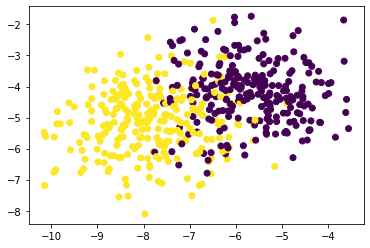

In [77]:
X, y = make_blobs(n_samples=500, centers=2, n_features=2)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(400, 2) (400,)
(100, 2) (100,)


In [80]:
model = KNNclassififer()
model.fit(X_train, y_train) # train
pred = model.predict(X_test)
test_accuracy = model.accuracy(pred, y_test)

In [81]:
print(test_accuracy)

0.89


## How to set K

In [84]:
ks = [1, 3, 5, 7, 9, 11, 51, 101, 201, 301, 400]

train_accs = []
test_accs = []
for i, k in enumerate(ks):
    model = KNNclassififer(k)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_acc = model.accuracy(train_pred, y_train)
    test_pred = model.predict(X_test)
    test_acc = model.accuracy(test_pred, y_test)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    print(f"K: {k}, Training accuracy: {train_acc}, Test Accuracy: {test_acc}")

K: 1, Training accuracy: 1.0, Test Accuracy: 0.86
K: 3, Training accuracy: 0.92, Test Accuracy: 0.89
K: 5, Training accuracy: 0.88, Test Accuracy: 0.9
K: 7, Training accuracy: 0.88, Test Accuracy: 0.91
K: 9, Training accuracy: 0.8825, Test Accuracy: 0.91
K: 11, Training accuracy: 0.88, Test Accuracy: 0.91
K: 51, Training accuracy: 0.88, Test Accuracy: 0.93
K: 101, Training accuracy: 0.88, Test Accuracy: 0.92
K: 201, Training accuracy: 0.875, Test Accuracy: 0.92
K: 301, Training accuracy: 0.8775, Test Accuracy: 0.93
K: 400, Training accuracy: 0.5125, Test Accuracy: 0.45


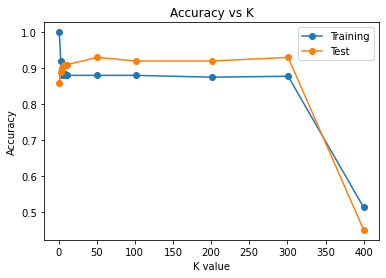

In [90]:
plt.plot(ks, train_accs, marker="o", label="Training")
plt.plot(ks, test_accs, marker="o", label="Test")
plt.legend()
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

## Decision boundary with varying K

In [99]:
f1 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
f2 = np.linspace(X[:,1].min(), X[:,1].max(), 100)

f1, f2 = np.meshgrid(f1,f2)

f1, f2 = f1.reshape(-1,1), f2.reshape(-1,1)

In [100]:
data = np.hstack([f1,f2])
print(data.shape)

(10000, 2)


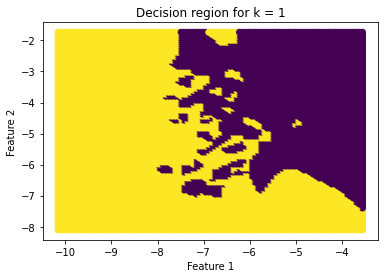

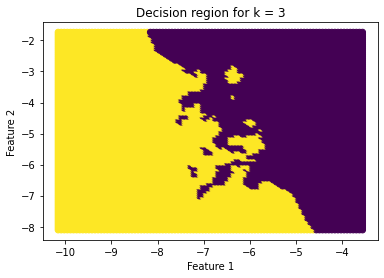

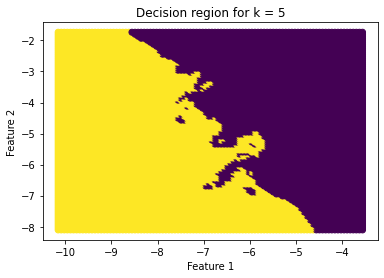

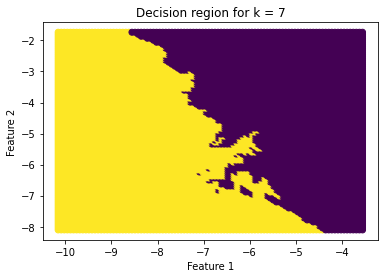

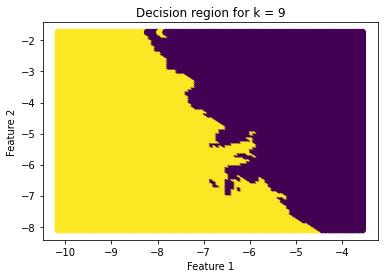

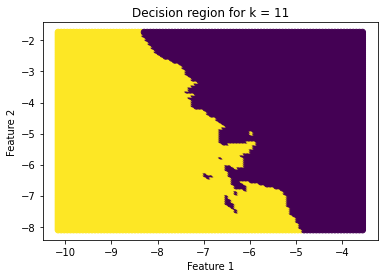

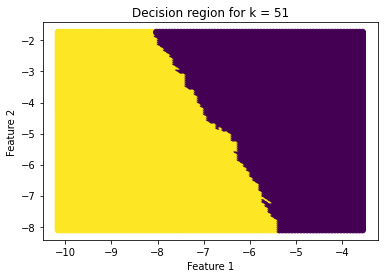

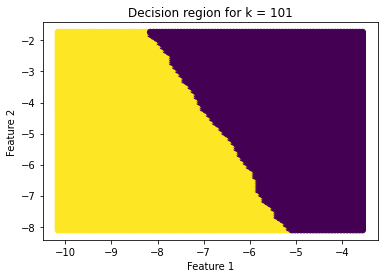

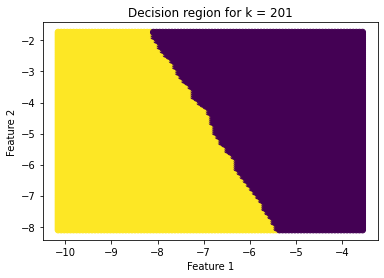

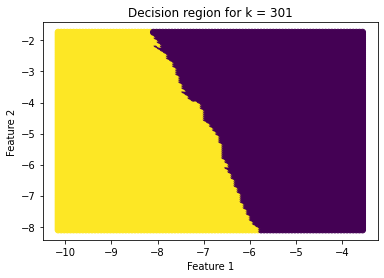

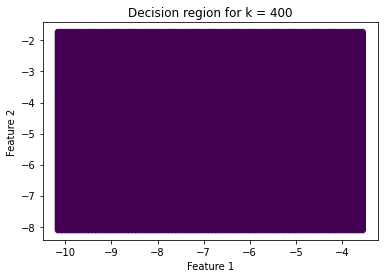

In [102]:

for k in ks:
    model = KNNclassififer(k)
    model.fit(X_train, y_train)
    predictions = model.predict(data)
    plt.scatter(f1, f2, c=predictions)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"Decision region for k = {model.k}")
    plt.show()